## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

## Importing and Understanding the Data 

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Checking Data Shape
data.shape

(303, 14)

In [4]:
# Checking unique values for each variable
vc = {}

for i in list(data.columns):
    vc[i] = data[i].value_counts().shape[0]
pd.DataFrame(vc, index=['value_counts']).transpose()

,value_counts
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


In [5]:
# Seperating the varaibel into categorical, numerical, and output 
categorical_columns = ['sex',  'cp', 'fbs','restecg', 'exng', 'slp','caa', 'thall']
numerical_columns = ['age', 'trtbps','chol', 'thalachh', 'oldpeak']
output_columns = ['output']

In [6]:
# Checking the numerical data
data[numerical_columns].describe()

,age,trtbps,chol,thalachh,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [7]:
# Checking missing data
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

## Univarate Analysis

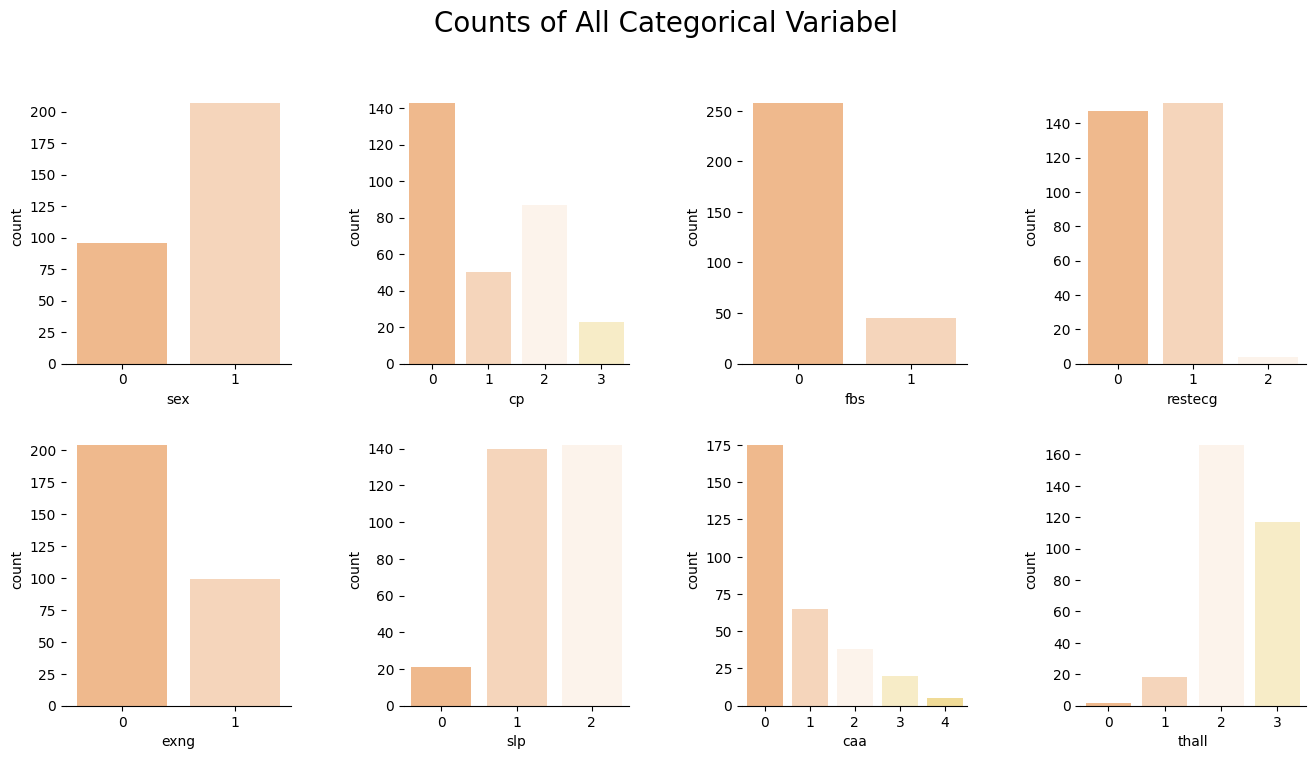

In [8]:
#Count for Categorical Variable
fig = plt.figure(figsize=(16,8))
gs = fig.add_gridspec(2,4)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[0,3])
ax4 = fig.add_subplot(gs[1,0])
ax5 = fig.add_subplot(gs[1,1])
ax6 = fig.add_subplot(gs[1,2])
ax7 = fig.add_subplot(gs[1,3])

background_color = '#FFFFFF'
color_pallete = ['#ffb77d', '#ffd4b1', '#fff3e8', '#fff0bf', '#ffe388']
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)
ax6.set_facecolor(background_color)
ax7.set_facecolor(background_color)

fig.suptitle('Counts of All Categorical Variabel', fontsize = 20)

sns.countplot(ax=ax0, data = data, x = 'sex', palette=color_pallete)
sns.countplot(ax=ax1, data = data, x = 'cp', palette=color_pallete)
sns.countplot(ax=ax2, data = data, x = 'fbs', palette=color_pallete)
sns.countplot(ax=ax3, data = data, x = 'restecg', palette=color_pallete)
sns.countplot(ax=ax4, data = data, x = 'exng', palette=color_pallete)
sns.countplot(ax=ax5, data = data, x = 'slp', palette=color_pallete)
sns.countplot(ax=ax6, data = data, x = 'caa', palette=color_pallete)
sns.countplot(ax=ax7, data = data, x = 'thall', palette=color_pallete)

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False) 
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)

<Axes: ylabel='oldpeak'>

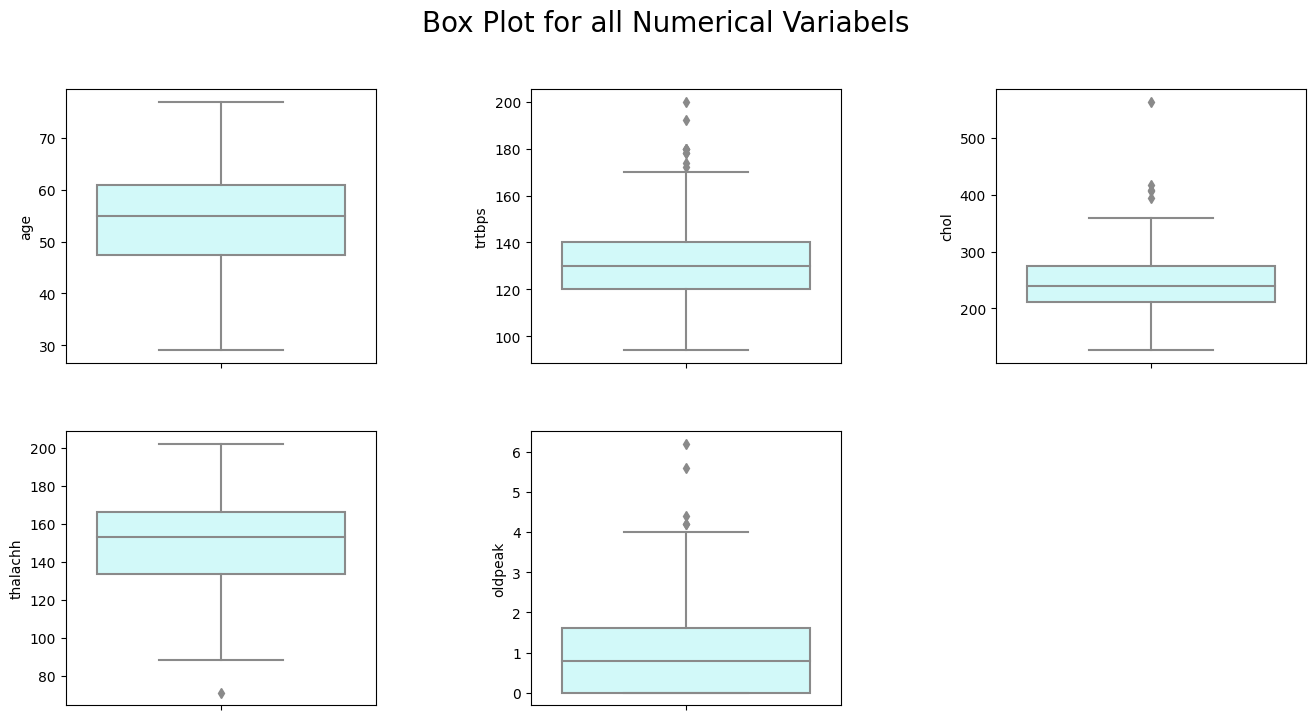

In [9]:
# Box plot for Numerical Variable
fig = plt.figure(figsize=(16,8))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])

background_color = '#FFFFFF'
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)

fig.suptitle('Box Plot for all Numerical Variabels', fontsize = 20)

sns.boxplot(ax=ax0, data = data, y = 'age', palette=['#CCFFFF'])
sns.boxplot(ax=ax1, data = data, y = 'trtbps', palette=['#CCFFFF'])
sns.boxplot(ax=ax2, data = data, y = 'chol', palette=['#CCFFFF'])
sns.boxplot(ax=ax3, data = data, y = 'thalachh', palette=['#CCFFFF'])
sns.boxplot(ax=ax4, data = data, y = 'oldpeak', palette=['#CCFFFF'])

[Text(0, 0, 'Low chances of attack(0)'),
 Text(1, 0, 'High chances of attack(1)')]

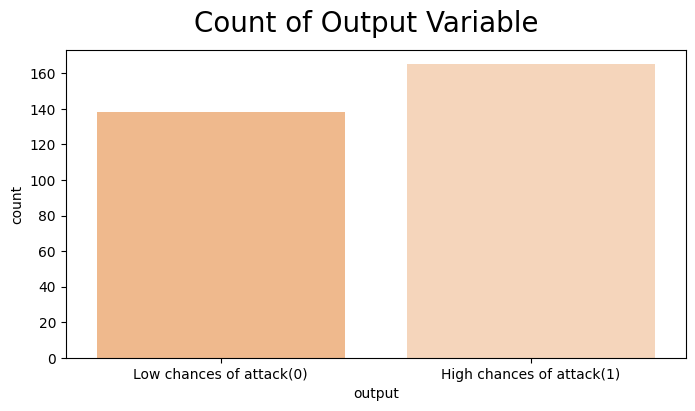

In [10]:
# Count of Output Variable
fig = plt.figure(figsize=(8,4))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])

fig.suptitle('Count of Output Variable', fontsize = 20)

background_color = '#FFFFFF'
color_pallete = ['#ffb77d', '#ffd4b1', '#fff3e8', '#fff0bf', '#ffe388']
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)

sns.countplot(ax=ax0, data = data, x = 'output', palette=color_pallete)
ax0.set_xticklabels(['Low chances of attack(0)',"High chances of attack(1)"])

## Bivariate Analysis

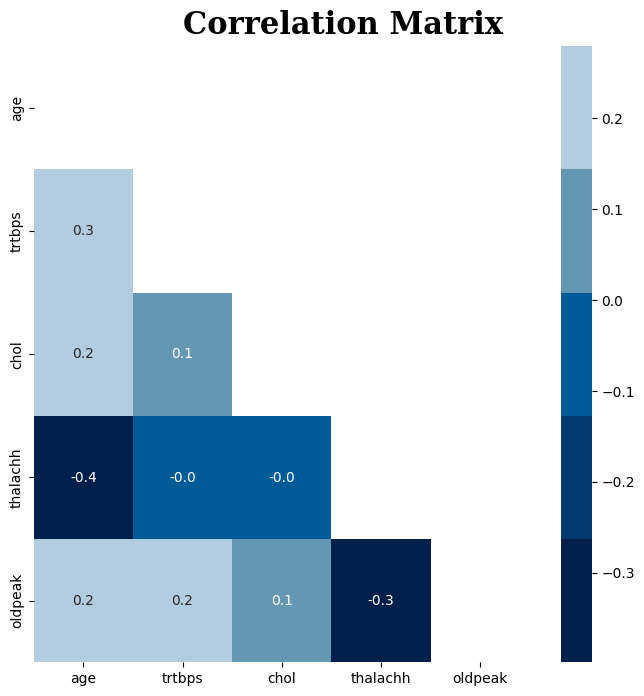

In [11]:
# Correlation matrix
fig = plt.figure(figsize=(8,8))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])

color_palette = ['#011f4b','#03396c','#005b96', '#6497b1', '#b3cde0']
data_corr = data[numerical_columns].corr()
mask = np.triu(np.ones_like(data_corr))
ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
sns.heatmap(data_corr,mask=mask,fmt=".1f",annot=True,cmap=color_palette)
plt.show()

C:\Users\henda\AppData\Local\Temp\ipykernel_9916\3567283024.py:13: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for artist in g.legend.legendHandles:


<Figure size 1400x1400 with 0 Axes>

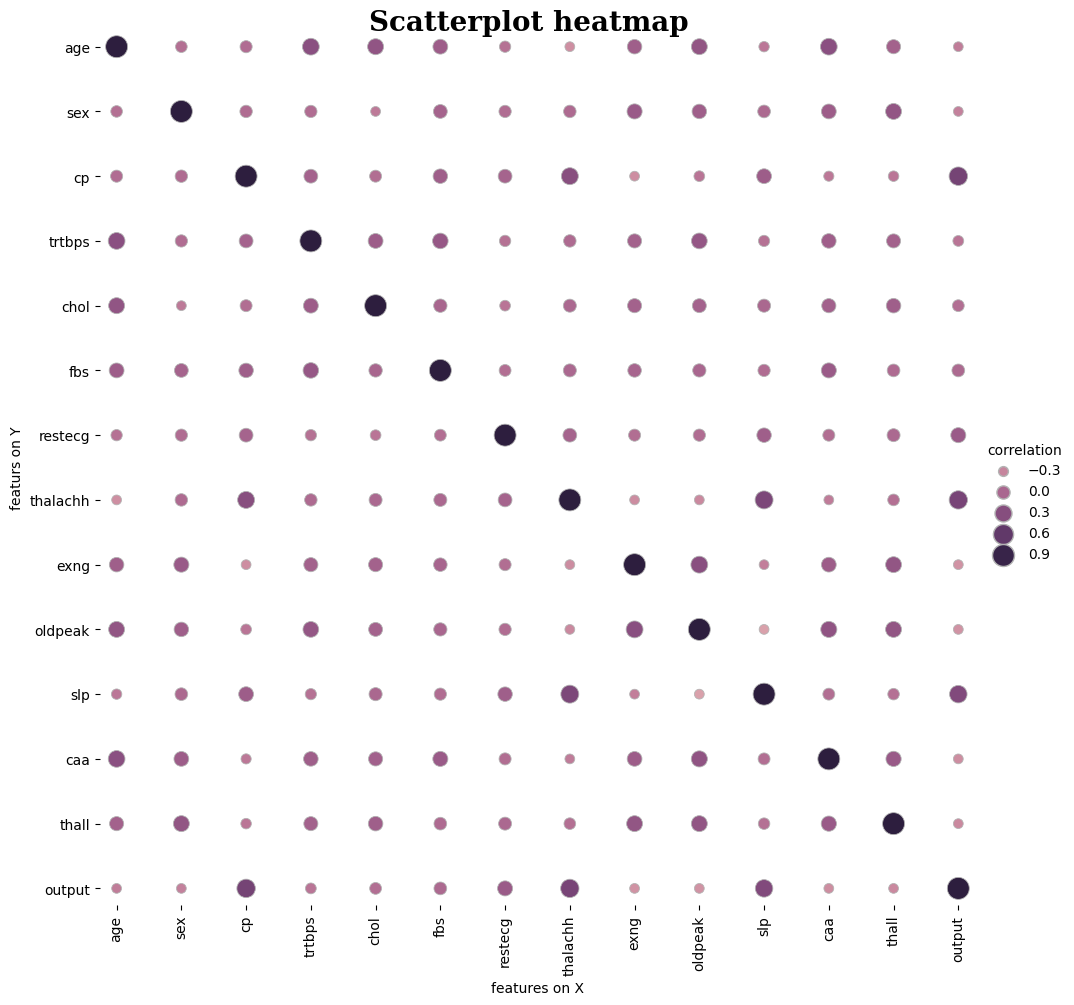

In [12]:
# Scatterplot heatmap
fig = plt.figure(figsize=(14,14))
corr_matrix = data.corr().stack().reset_index(name='correlation')
g = sns.relplot(data = corr_matrix, x = 'level_0', y = 'level_1',
                hue = 'correlation', size = 'correlation',hue_norm=(-1,1), 
                edgecolor = '.7',height = 10, sizes = (50,250), size_norm= (-.2,.8))
g.set(xlabel="features on X", ylabel="featurs on Y", aspect="equal")
g.fig.suptitle('Scatterplot heatmap',fontsize=20, fontweight='bold', fontfamily='serif', color="#000000")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")
plt.show()

<Axes: xlabel='oldpeak', ylabel='Density'>

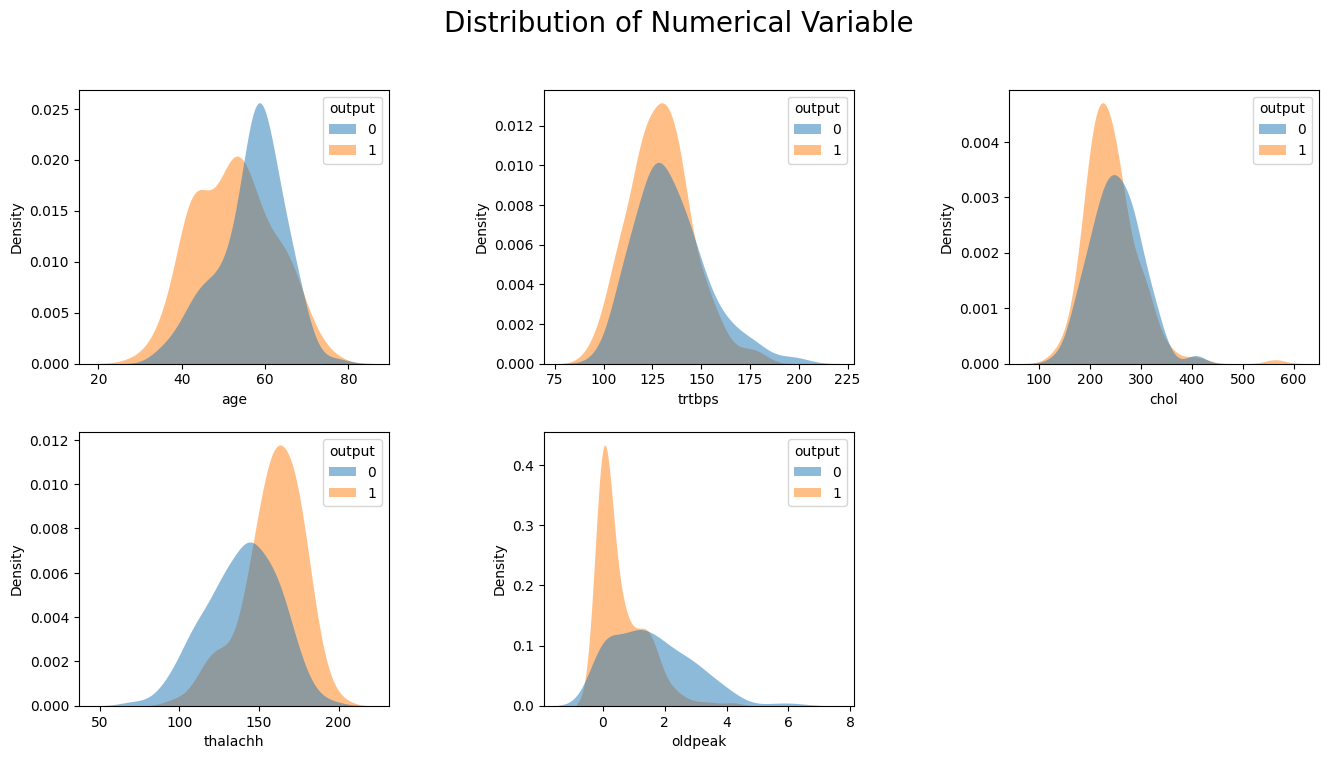

In [13]:
# Distribution if numerical variable to Output Variable
fig = plt.figure(figsize=(16,8))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])

background_color = '#FFFFFF'
color_palette = ['#011f4b','#03396c','#005b96', '#6497b1', '#b3cde0']
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
fig.suptitle('Distribution of Numerical Variable', fontsize = 20)

sns.kdeplot(ax=ax0, data=data, x='age', hue='output', fill=True, alpha=.5, linewidth=0)
sns.kdeplot(ax=ax1, data=data, x='trtbps', hue='output', fill=True, alpha=.5, linewidth=0)
sns.kdeplot(ax=ax2, data=data, x='chol', hue='output', fill=True, alpha=.5, linewidth=0)
sns.kdeplot(ax=ax3, data=data, x='thalachh', hue='output', fill=True, alpha=.5, linewidth=0)
sns.kdeplot(ax=ax4, data=data, x='oldpeak', hue='output', fill=True, alpha=.5, linewidth=0)

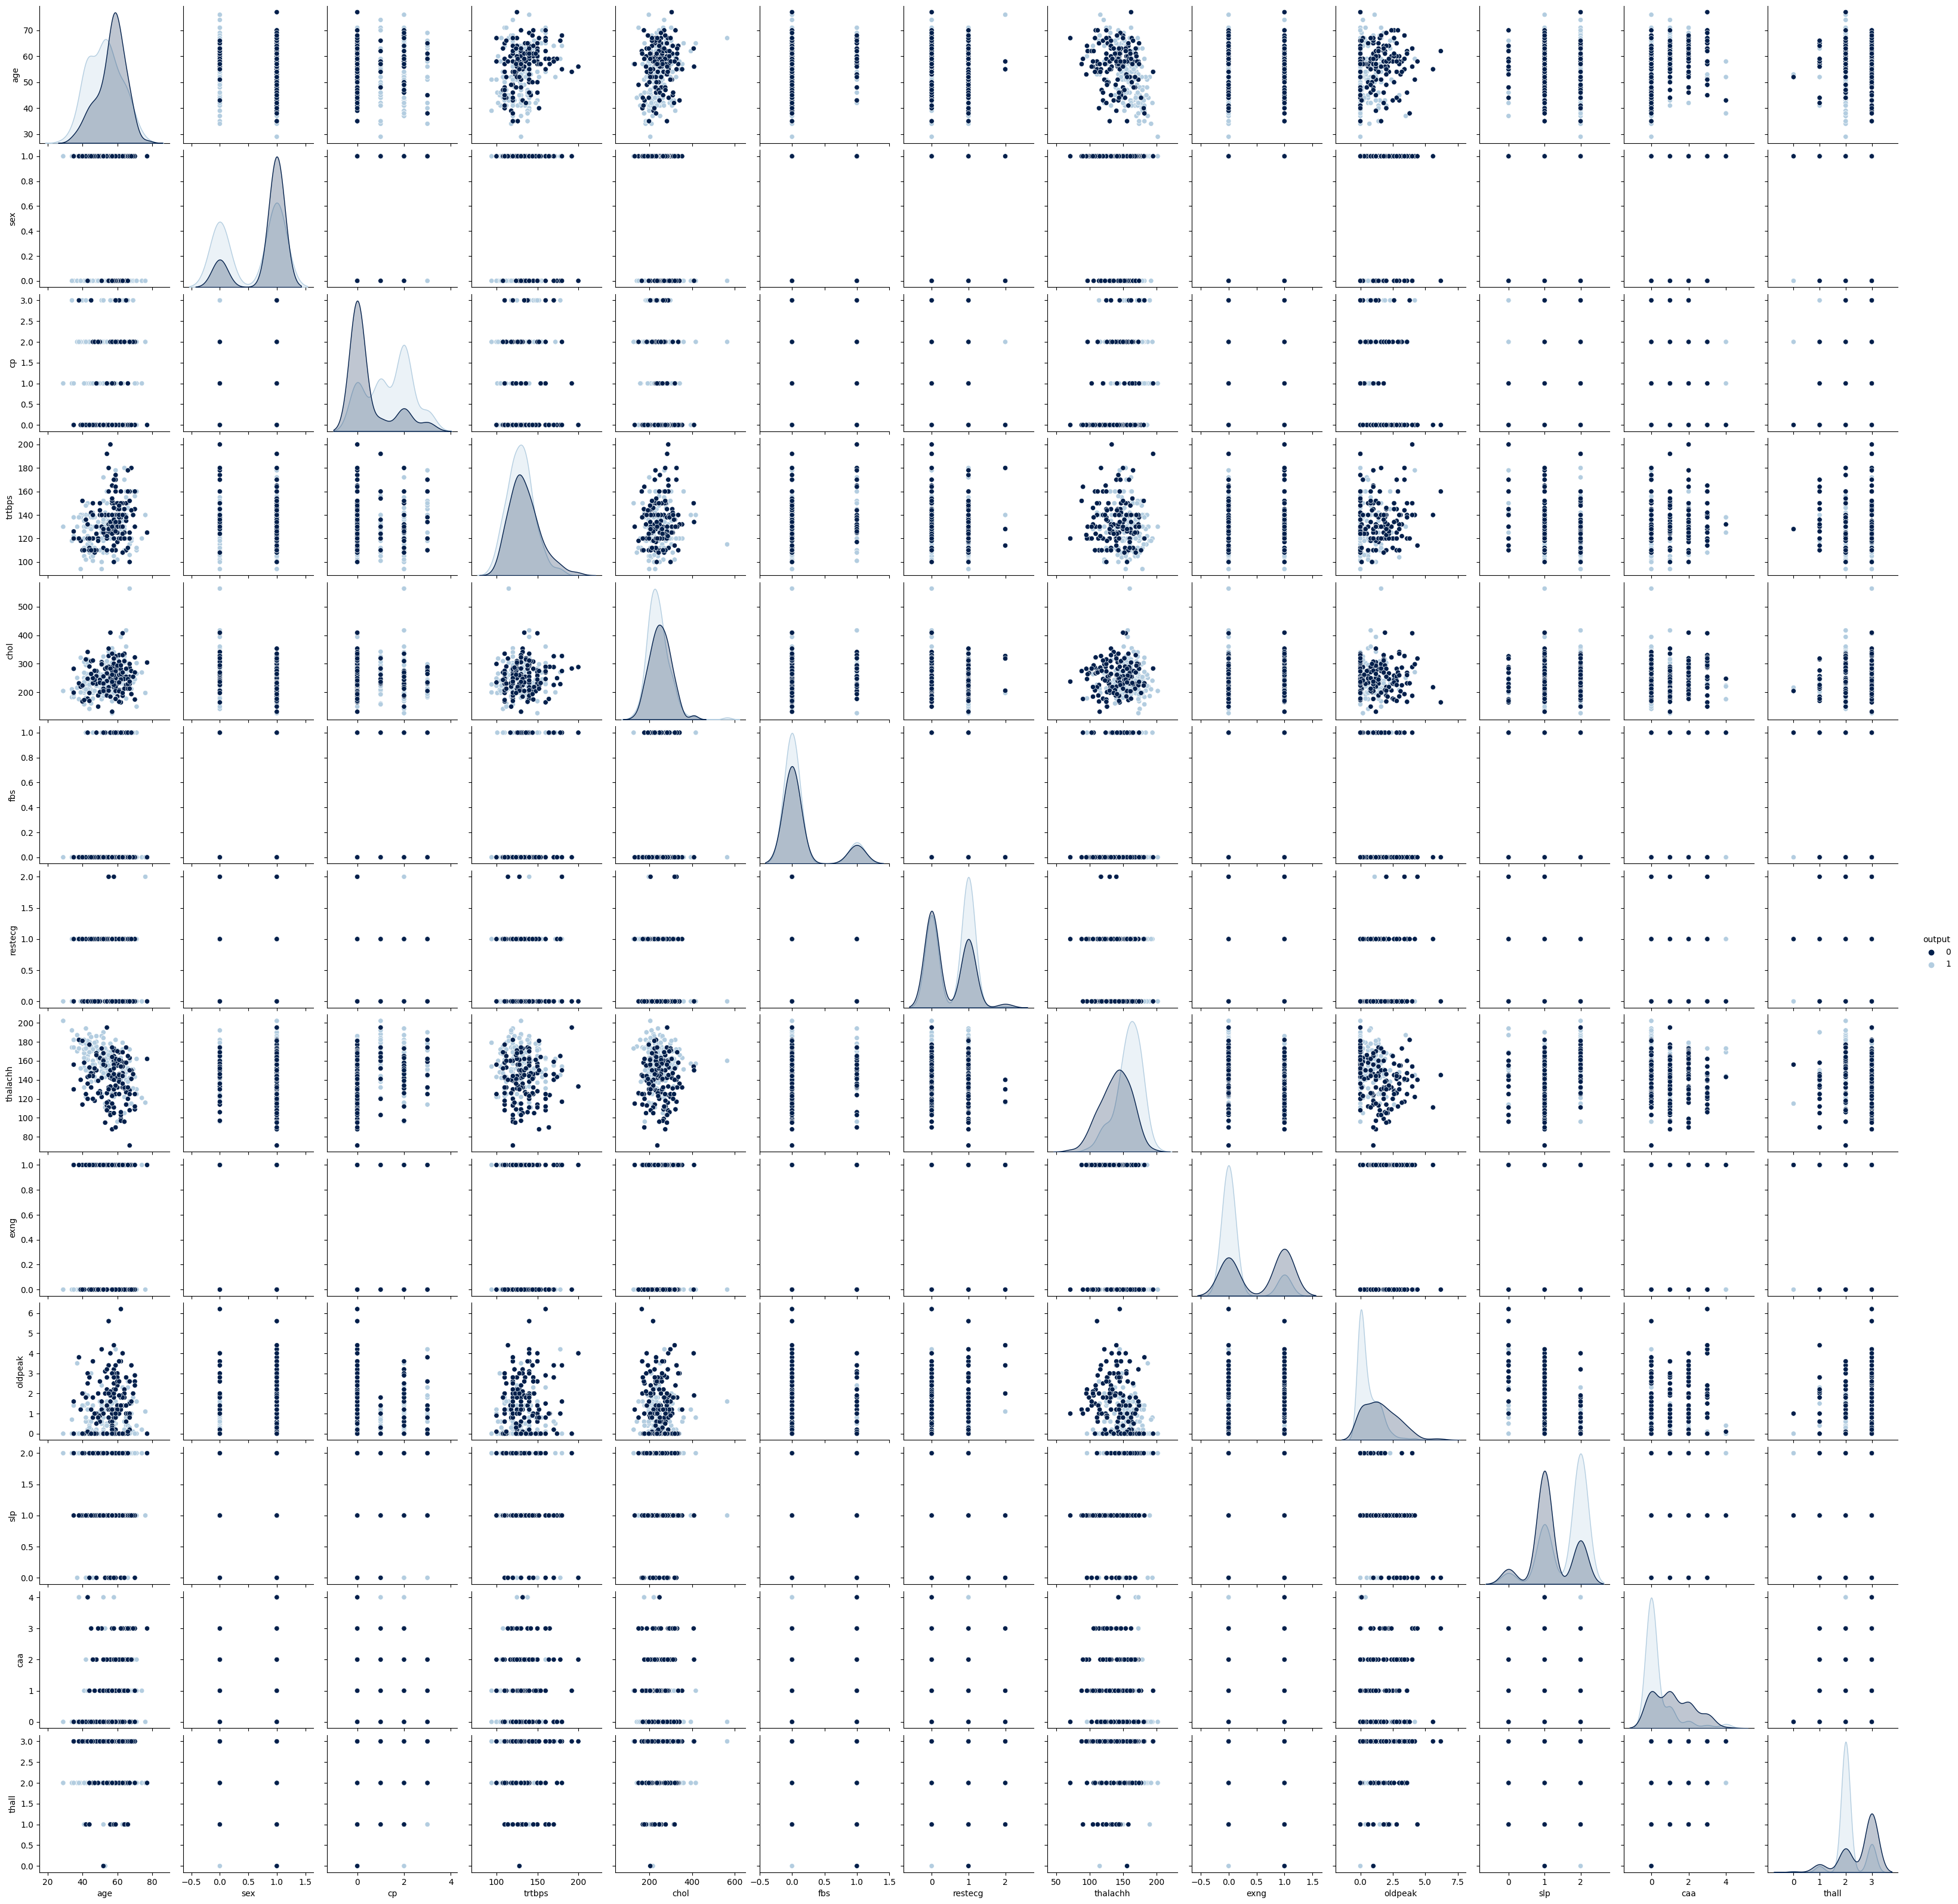

In [14]:
# Pairplot of all variable
sns.pairplot(data,hue='output',palette = ['#011f4b','#b3cde0'])
plt.show()

## Data Preprocessing

In [15]:
#Encoding Categorical Data
df = data

encoder = OneHotEncoder()
cat_encoded = pd.DataFrame(encoder.fit_transform(df[categorical_columns]).toarray(),
                            columns=encoder.get_feature_names_out(categorical_columns))
df_encoded = pd.concat([cat_encoded, df[numerical_columns], df[output_columns]], axis=1)

In [16]:
df_encoded

,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,...,thall_0,thall_1,thall_2,thall_3,age,trtbps,chol,thalachh,oldpeak,output
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,63,145,233,150,2.3,1
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,37,130,250,187,3.5,1
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,41,130,204,172,1.4,1
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,56,120,236,178,0.8,1
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,57,120,354,163,0.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,57,140,241,123,0.2,0
299,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,45,110,264,132,1.2,0
300,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,68,144,193,141,3.4,0
301,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,57,130,131,115,1.2,0


In [17]:
# Selecting Dependen and Independent Variable
X = df_encoded.iloc[:, :-1].values
y = df_encoded.iloc[:, -1].values

In [18]:
# Splitting the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [19]:
# Scaling the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [20]:
def train_model(X_train, y_train):
    #load the model
    lr = LogisticRegression(random_state=0)
    knn = KNeighborsClassifier()
    svm = SVC(kernel='linear', random_state=0, probability=True)
    ksvm = SVC(kernel='rbf', random_state=0, probability=True)
    nb = GaussianNB()
    dtc = DecisionTreeClassifier(criterion='entropy', random_state=0)
    rfc = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
    
    #train the model
    lr.fit(X_train,y_train)
    knn.fit(X_train, y_train)
    svm.fit(X_train, y_train)
    ksvm.fit(X_train, y_train)
    nb.fit(X_train, y_train)
    dtc.fit(X_train, y_train)
    rfc.fit(X_train, y_train)
    
    return lr, knn, svm, ksvm, nb, dtc, rfc

In [21]:
def evaluate_model(model, X_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(X_test)
    pos = np.unique(y_test)[1]

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred, pos_label=pos)
    rec = metrics.recall_score(y_test, y_pred, pos_label=pos)
    f1 = metrics.f1_score(y_test, y_pred, pos_label=pos)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba, pos_label= pos)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [22]:
models = train_model(X_train, y_train)
lr, knn, svm, ksvm, nb, dtc, rfc = models

In [23]:
lr_eval = evaluate_model(lr, X_test, y_test)
knn_eval = evaluate_model(knn, X_test, y_test)
svm_eval = evaluate_model(svm, X_test, y_test)
ksvm_eval = evaluate_model(lr, X_test, y_test)
nb_eval = evaluate_model(nb, X_test, y_test)
dtc_eval = evaluate_model(dtc, X_test, y_test)
rfc_eval = evaluate_model(rfc, X_test, y_test)

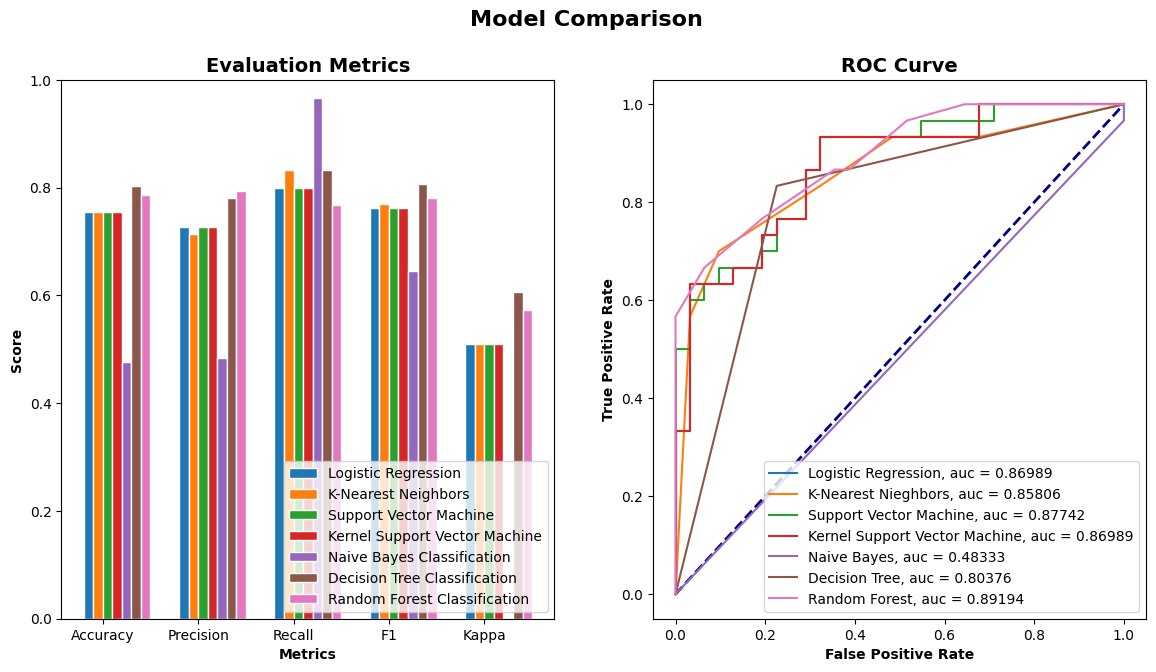

In [24]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.1
lr_score = [lr_eval['acc'], lr_eval['prec'], lr_eval['rec'], lr_eval['f1'], lr_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]
svm_score = [svm_eval['acc'], svm_eval['prec'], svm_eval['rec'], svm_eval['f1'], svm_eval['kappa']]
ksvm_score = [ksvm_eval['acc'], ksvm_eval['prec'], ksvm_eval['rec'], ksvm_eval['f1'], ksvm_eval['kappa']]
nb_score = [nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1'], nb_eval['kappa']]
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1'], dtc_eval['kappa']]
rfc_score = [rfc_eval['acc'], rfc_eval['prec'], rfc_eval['rec'], rfc_eval['f1'], rfc_eval['kappa']]



## Set position of bar on X axis
r1 = np.arange(len(lr_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]

## Make the plot
ax1.bar(r1, lr_score, width=barWidth, edgecolor='white', label='Logistic Regression')
ax1.bar(r2, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')
ax1.bar(r3, svm_score, width=barWidth, edgecolor='white', label='Support Vector Machine')
ax1.bar(r4, ksvm_score, width=barWidth, edgecolor='white', label='Kernel Support Vector Machine')
ax1.bar(r5, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes Classification')
ax1.bar(r6, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree Classification')
ax1.bar(r7, rfc_score, width=barWidth, edgecolor='white', label='Random Forest Classification')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0., 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend(loc=4)

# Second plot
## Comparing ROC Curve
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax2.plot(lr_eval['fpr'], lr_eval['tpr'], label='Logistic Regression, auc = {:0.5f}'.format(lr_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbors, auc = {:0.5f}'.format(knn_eval['auc']))
ax2.plot(svm_eval['fpr'], svm_eval['tpr'], label='Support Vector Machine, auc = {:0.5f}'.format(svm_eval['auc']))
ax2.plot(ksvm_eval['fpr'], ksvm_eval['tpr'], label='Kernel Support Vector Machine, auc = {:0.5f}'.format(ksvm_eval['auc']))
ax2.plot(nb_eval['fpr'], nb_eval['tpr'], label='Naive Bayes, auc = {:0.5f}'.format(nb_eval['auc']))
ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))
ax2.plot(rfc_eval['fpr'], rfc_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rfc_eval['auc']))



## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

## Explanation and Discussion

The evaluation metrics in the above table are used to compare the performance of the different machine learning models used to predict heart attack. Here is a brief explanation of each of the metrics:

1. Accuracy: It measures the ratio of correctly predicted instances to the total number of instances. In our case, it indicates the percentage of correctly predicted heart attack cases out of all the cases. The best value is 1.0 and the worst value is 0.0.

2. Precision: It is the ratio of true positive predictions to the total number of positive predictions. In our case, it indicates the percentage of correctly predicted heart attack cases out of all the predicted cases. The best value is 1.0 and the worst value is 0.0.

3. Recall: It is the ratio of true positive predictions to the total number of actual positive instances. In our case, it indicates the percentage of correctly predicted heart attack cases out of all the actual cases. The best value is 1.0 and the worst value is 0.0.

4. F1-Score: It is the harmonic mean of precision and recall. It is a better metric when the classes are imbalanced. The best value is 1.0 and the worst value is 0.0.

5. Kappa: It is a measure of agreement between predicted and actual instances. It takes into account the possibility of random agreement. The best value is 1.0 and the worst value is -1.0.

6. AUC: It measures the ability of the model to distinguish between positive and negative classes. The best value is 1.0 and the worst value is 0.5.

Based on the results in the table, the Decision Tree and Random Forest models perform the best with the highest overall accuracy and AUC scores. Therefore, we can conclude that the Decision Tree and Random Forest models are the most effective machine learning models for predicting heart attack using the given dataset.